# E-commerce Customer Segmentation
 
Problem Statement:
Given the e-commerce data, use k-means clustering algorithm to cluster
customers with similar interest. 

In [1]:
import pandas as pd
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("cust_data.xlsx")
df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


# Checking the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

# Checking Summary Statistic

In [4]:
df.describe()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,...,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,8660.398374,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,...,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15000.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22500.250000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30000.000000,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,...,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

In [7]:
df["Gender"].value_counts()

F    22054
M     5222
Name: Gender, dtype: int64

In [8]:
df["Gender"].fillna("F",inplace=True)

In [9]:
df1=df.iloc[:,3:38]
df1.head()

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


### FINDING OUT THE OUTLIERS USING BOXPLOT 

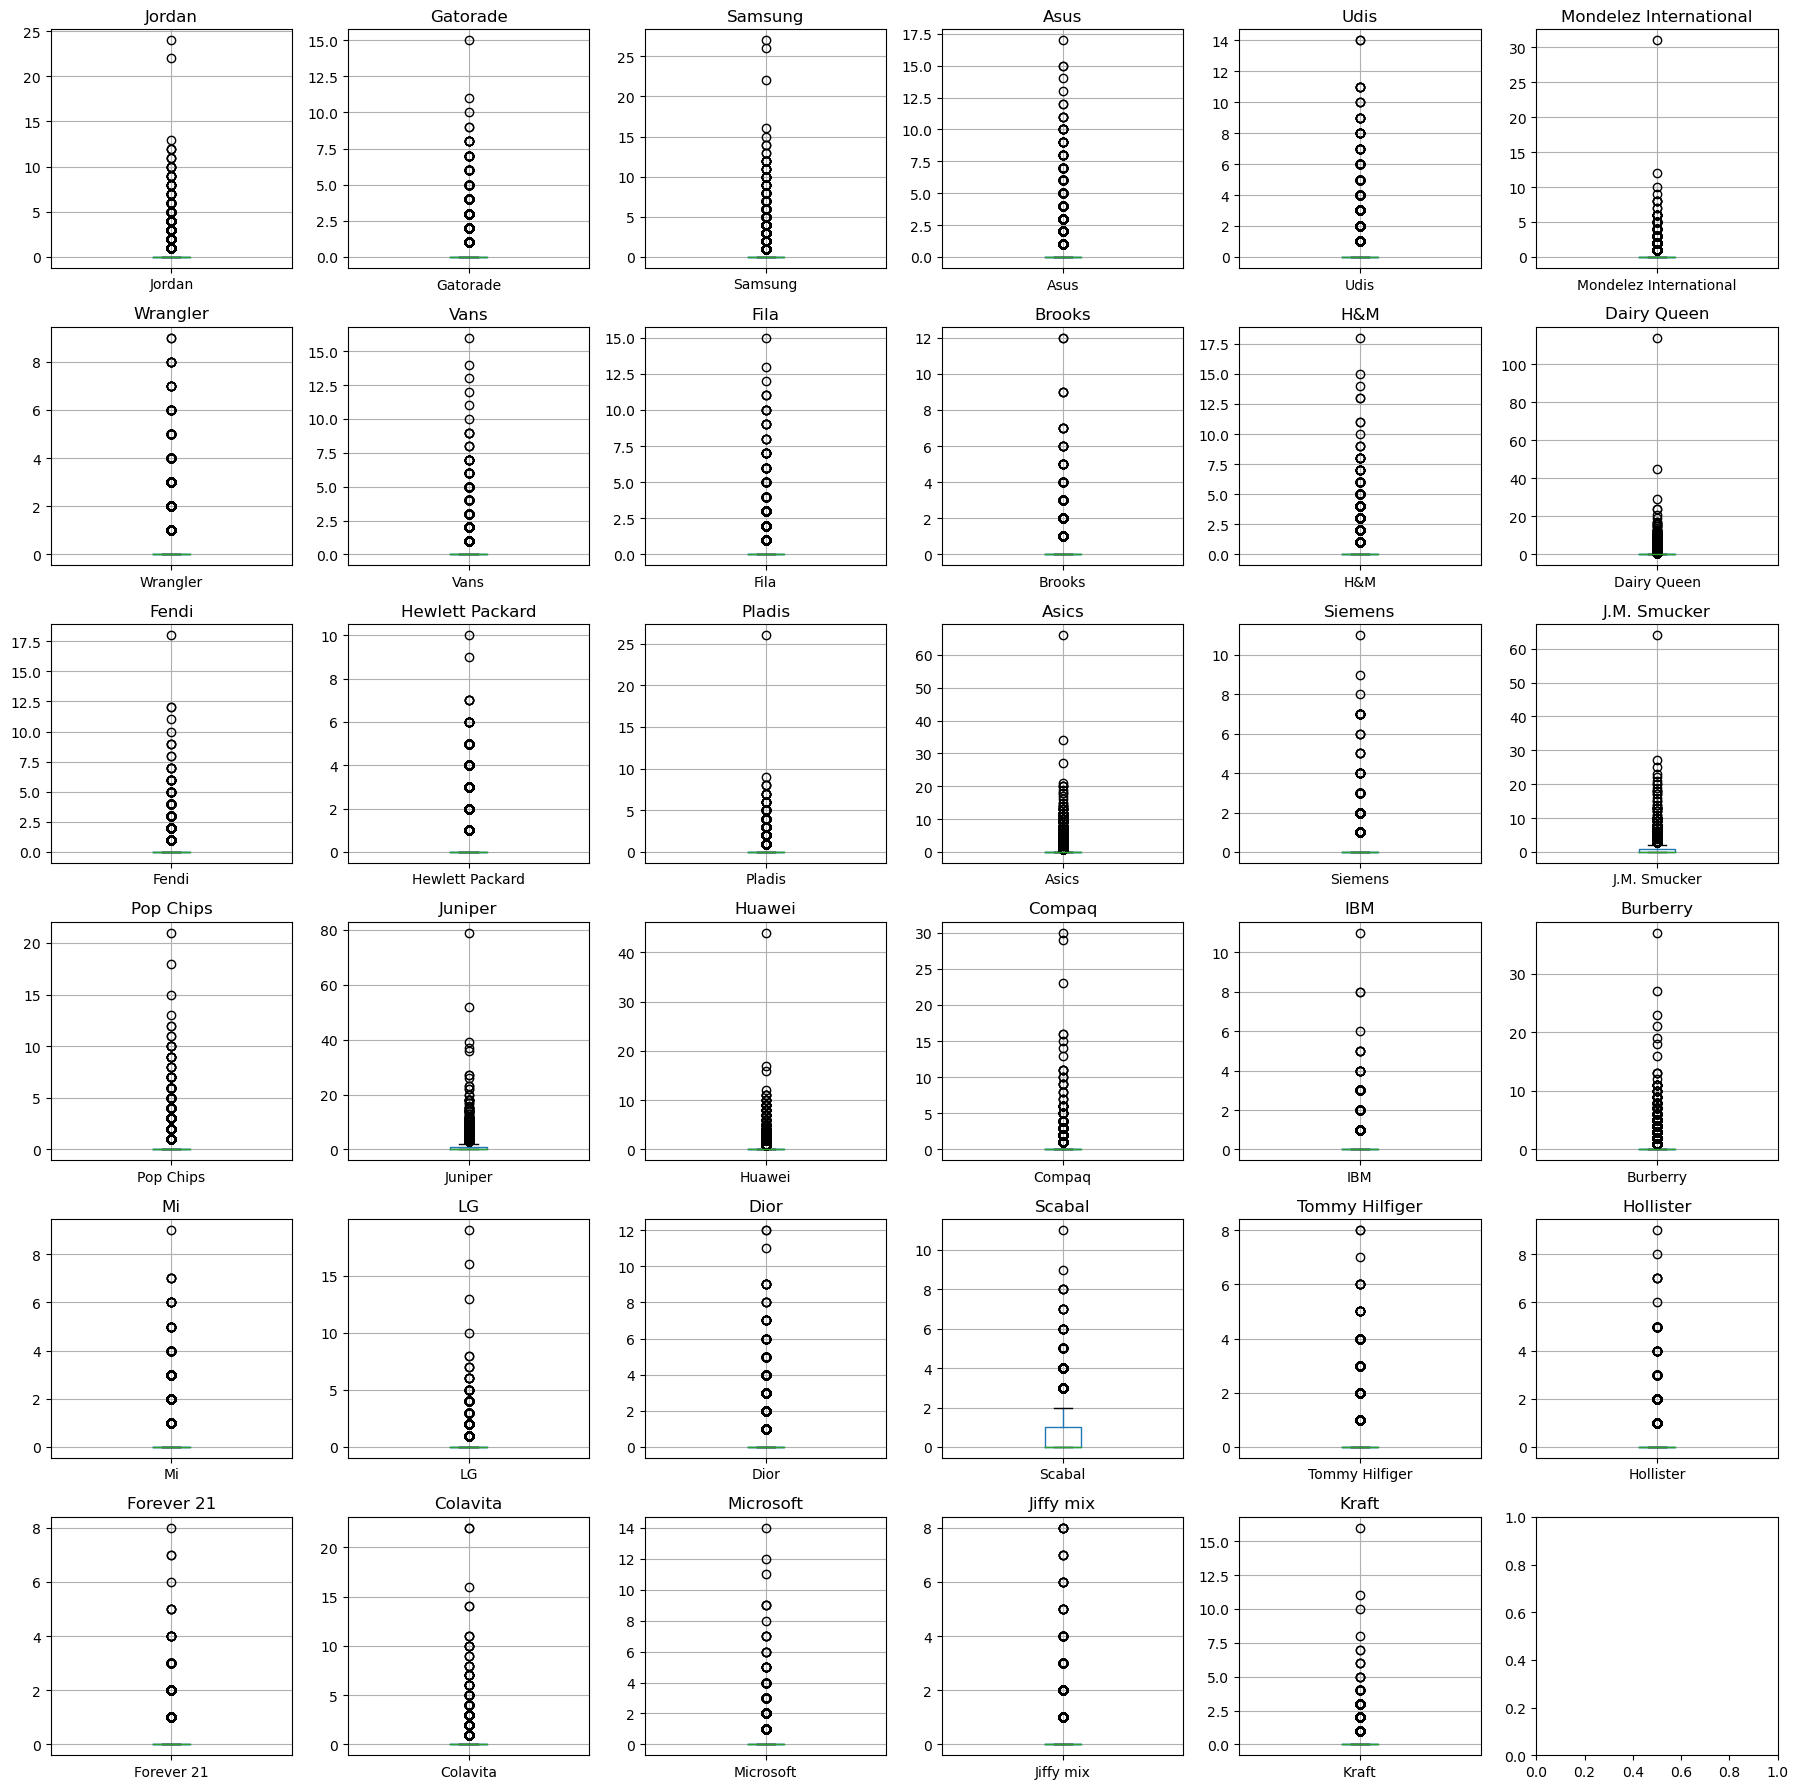

In [10]:
columns_to_plot = df1.columns[:36]

fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(18, 18))
for i, column in enumerate(columns_to_plot):
    ax = axes[i // 6, i % 6]  # Get the appropriate axis for the subplot
    df1.boxplot(column=column, ax=ax)  
    ax.set_title(column)  
plt.tight_layout() 
plt.show()

We have find that data contain Outliers

In E-commerce industry usually product purchased by customer during their Leisure time or wait for festive offers and discounts so it may affect the frequency of searching

#### For analysing the E-commerce data its better features containing outliers


# Creating Clusters using KMeans

### Forming 2 Clusters with K=2

In [11]:
# Create K Means cluster and store the result in the object k_means
k_means = KMeans(n_clusters = 2,random_state=0)

In [12]:
# Fit K means on the df1
k_means.fit(df1)

KMeans(n_clusters=2, random_state=0)

# Within Cluster Sum of Squares

In [13]:
k_means.inertia_

493229.5140257676

# Forming clusters with K = 1,3,4,5,6 and comparing the WSS

In [14]:
k_means = KMeans(n_clusters = 1,random_state=0)
k_means.fit(df1)
k_means.inertia_

531796.4026999999

In [15]:
k_means = KMeans(n_clusters = 3,random_state=0)
k_means.fit(df1)
k_means.inertia_

471832.2012283611

In [16]:
k_means = KMeans(n_clusters = 4,random_state=0)
k_means.fit(df1)
k_means.inertia_

452910.1682746952

In [17]:
k_means = KMeans(n_clusters = 5,random_state=0)
k_means.fit(df1)
k_means.inertia_

437662.83693762036

In [18]:
k_means = KMeans(n_clusters = 6,random_state=0)
k_means.fit(df1)
k_means.inertia_

420566.8179834744

WSS reduces as K keeps increasing

# Calculating WSS for other values of K - Elbow Method

In [19]:
wss=[]
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=0)
    KM.fit(df1)
    wss.append(KM.inertia_)

In [20]:
wss

[531796.4026999999,
 493229.5140257676,
 471832.2012283611,
 452910.1682746952,
 437662.83693762036,
 420566.8179834744,
 408532.00194386474,
 398271.8905145048,
 386374.37844923435,
 376030.0912239136]

In [21]:
a=[1,2,3,4,5,6,7,8,9,10]

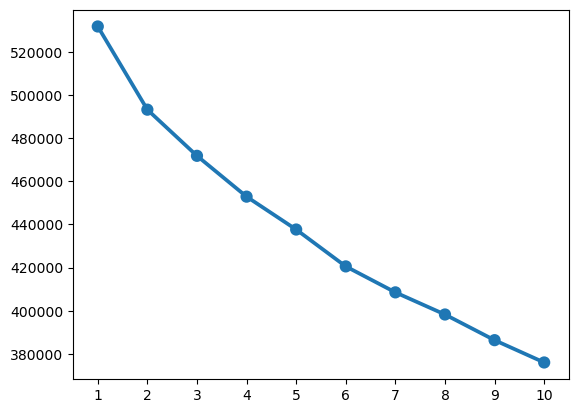

In [22]:
sns.pointplot(x=a, y=wss)
plt.show()

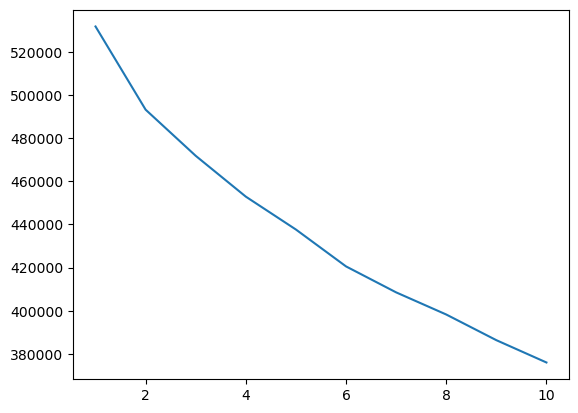

In [23]:
plt.plot(range(1,11), wss)
plt.show()

# KMeans with K=3

In [24]:
k_means = KMeans(n_clusters = 3,random_state=0)
k_means.fit(df1)
labels = k_means.labels_

# Cluster evaluation for 3 clusters: the silhouette score

In [25]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [26]:
# Calculating silhouette_score
silhouette_score(df1,labels,random_state=0)

0.3825271709475449

# KMeans with K=4

In [27]:
k_means = KMeans(n_clusters = 4,random_state=0)
k_means.fit(df1)
labels = k_means.labels_

In [28]:
silhouette_score(df1,labels,random_state=0)

0.18773226848036997

# KMeans with K=2

In [29]:
k_means = KMeans(n_clusters = 2,random_state=0)
k_means.fit(df1)
labels = k_means.labels_

In [30]:
silhouette_score(df1,labels,random_state=0)

0.427478581437847

###  silhouette score is better for 2 clusters than for 3 & 4 clusters. So, final clusters will be 2

Appending Clusters to the original dataset

In [31]:
df["cluster"] = labels
df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,cluster
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,F,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,F,10,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,0


In [32]:
df.cluster.value_counts().sort_index()

0     3423
1    26577
Name: cluster, dtype: int64

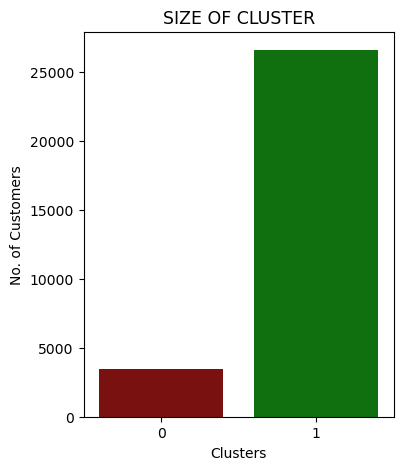

In [33]:
plt.figure(figsize=(4,5))
sns.countplot(data= df, x = 'cluster', palette=['darkred',"green"])
plt.title('SIZE OF CLUSTER', fontsize = 12.5)
plt.xlabel('Clusters')
plt.ylabel('No. of Customers')
cluster=df.cluster.value_counts().sort_index(ascending=True)
plt.show()

# Cluster Profiling

In [35]:
clust_profile=df.drop(['Cust_ID','Gender','Orders'],axis=1)
clust_profile=clust_profile.groupby('cluster').sum()
clust_profile['cluster']=df.cluster.value_counts().sort_index()
clust_profile

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,cluster
cluster,,,,,,,,,,,,,,,,,,,,,
0,1920,1660,1327,946,825,848,728,743,534,1150,...,2114,2231,1618,531,444,1955,1004,941,976,3423
1,6103,5910,5361,3894,3481,3345,2480,2600,2294,3054,...,6020,8871,3151,1799,1276,3811,2487,1700,1151,26577


In [50]:
clust_profile.rename(columns={'cluster': 'Brand'},inplace=True) 

In [51]:
clust_profile

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Brand
cluster,,,,,,,,,,,,,,,,,,,,,
0,1920,1660,1327,946,825,848,728,743,534,1150,...,2114,2231,1618,531,444,1955,1004,941,976,3423
1,6103,5910,5361,3894,3481,3345,2480,2600,2294,3054,...,6020,8871,3151,1799,1276,3811,2487,1700,1151,26577


In [39]:
brand_sort_0 = clust_profile.iloc[:, 0:1].T.sort_values(by=0, ascending=False).head(10)
brand_sort_1 = clust_profile.iloc[:, 1:].T.sort_values(by=1, ascending=False).head(10)


# <br>


----
 ## <center>CLUSTER 1 REPORT</center> 
---

We can use **cluster 1** for brand search analysis which hold highest brand searches around **26437** customers

#####  MOST AND LEAST SEARCHED BRAND BY CUSTOMER
- Most frequent searched brand by customer is  **J.M. Smucker**
	Customer are likely to search ***food*** related brands <br>
- Least frequent searched brand by customer is   **IBM**

<br>

##### <center> HERE I LISTED SOME OF THE BRANDS HOLD THE  TOP CUSTOMER BASE</center>


|TYPE OF INDUSTRY | BRANDS   |
|--|--|
| Food and Drink | ***J.M. Smucker*** , ***Gatorade*** |
|   Fashion brands         | ***Scabal, H&M, Dior, Burberry***     |
|Technology and Networking | ***Juniper***                         |
|Mobile brands             | ***Samsung*** and ***Huawei***        |
|Sports brands             | ***Jordan***                          |



> <font color='green'>CLUSTER 1 - BRANDS MOSTLY ENGAGED BY CUSTOMERS WHILE BRAND SEARCHING AND AN INFLUENCE OF PREVILAGE TO MODERATE CUSTOMER FOR PLACING ORDERS</font>
>> ##### OVERALL CONCLUSION FOR CLUSTER 1 IS CUSTOMER LIKELY TO SEARCH FOOD , CLOTHING , MOBILES AND SPORTWEARS BRANDS

<br>
<br>

---
### <center>CLUSTER 0 REPORT</center> 
---


We can see that **cluster 0** hold low-set brand searches around **3563** customers <br>

> <font color='red'>CLUSTER 0 - INEXPENSIVE BRANDS  AND THIS LEADS TO LESS INFULENCE OF PREVILAGE CUSTOMER WHILE SEARCHING OF BRANDS</font>
>> ###### BY ADDING FESTIVE OFFERS  AND REASONABLE DISCOUNTS IT LEADS TO FASCINATE ABOUT THE BRANDS WHILE CUSTOMERS SEARCHING FOR A PRODUCTS  
>>> ##### OVERALL CONCLUSION FOR CLUSTER 0 IS IT WILL ATTRACT LESS NUMBER OF CUSTOMERS 



##### CONCLUSION:
---
<br>

In E-commerce customer segmentation the k-Means clustering plays major role for identifying the purchase pattern based on customer interest ,Here I used **silhoutte score** for finding an optimal cluster number to predict the right **n_cluster**.
<br>

After that splitting cluster into **cluster 1** is previlge to moderate customer and **cluster 0** is low-set of interest in purchasing
    